In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import pandas as pd

In [2]:
path_data = 'data/'

In [3]:
pokemon = pd.read_csv(path_data + 'pokemon.csv')
combat = pd.read_csv(path_data + 'combat.csv')

In [4]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# First question set

The describe() method will give us some interesting insights into the properties of out data.

In [5]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


We can access a list of some informations ragarding a specific feature

In [6]:
print('Those are some characteristics relating to the Attack stat:')
pokemon.describe()['Attack']

Those are some characteristics relating to the Attack stat:


count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

In [7]:
print('Those are some characteristics relating to the Defense stat:')
pokemon.describe()['Defense']

Those are some characteristics relating to the Defense stat:


count    800.000000
mean      73.842500
std       31.183501
min        5.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      230.000000
Name: Defense, dtype: float64

In [8]:
print('In particular the mean Regular Attack is circa {:.2f} (std dev = {:.2f}) and the mean Regular defense is circa {:.2f} (std dev = {:.2f}).'
      .format(pokemon.describe()['Attack'][1], pokemon.describe()['Attack'][2], pokemon.describe()['Defense'][1], pokemon.describe()['Defense'][2]))

In particular the mean Regular Attack is circa 79.00 (std dev = 32.46) and the mean Regular defense is circa 73.84 (std dev = 31.18).


In [9]:
print('The number of Classes is {:}.'.format(pokemon['Class 1'].describe()[1]))

The number of Classes is 18.


## Calculating the probability distributions of the variables

The two variables are distributed as follows:


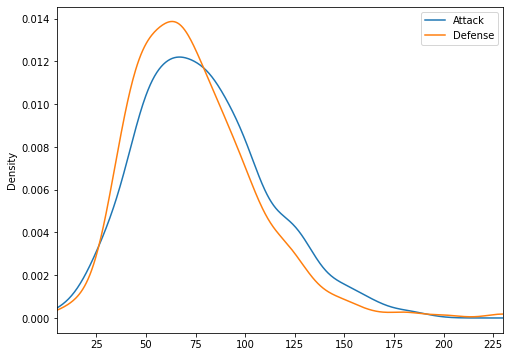

In [10]:
# The two variable sets of interest are:
reg_attack = pokemon['Attack']
reg_defense = pokemon['Defense']

# pandas conveniently offers a method to estimate the probability distribution

# Note: Technically Reg. Attack/Defense are discrete variables and the probability densities are 
# calculated differently, I think however approximating the continuous case is fair game here

plt.figure(figsize=(8,6))
reg_attack.plot.kde()
reg_defense.plot.kde()


# setting the x axis to range from the minimum to the maximum value present within the set 
# (the algorithm may associate a non-zero density to values outside of this interval, however we know better)
min = np.min((pokemon.describe()['Attack'][3], pokemon.describe()['Defense'][3]))
max = np.max((pokemon.describe()['Attack'][7], pokemon.describe()['Defense'][7]))
plt.xlim(min, max)
plt.legend()

print('The two variables are distributed as follows:')

## An appropriate plot

An illustration of the relation between the two features is a scatter plot, plotting the two features against each other. That is: each point in the plot corresponds to the two stats for one Pokemon.

Within a scatter plot one might be able to infer some intersting features, such as clusters or just make a regression analysis.

Text(0.5, 1.0, 'Scatter plot')

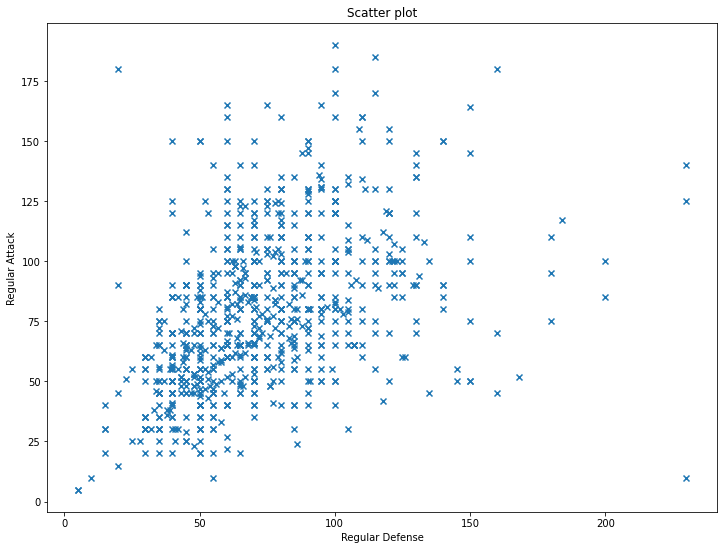

In [11]:
plt.figure(figsize=(12,9))
plt.scatter(reg_defense, reg_attack, marker='x')
# plt.plot(reg_defense, reg_defense, 'r')
plt.xlabel('Regular Defense')
plt.ylabel('Regular Attack')
plt.title ('Scatter plot')

There is no signifiicant clustering here. For example the Pokemon could have been divided into tank builds (low attack, high defense) and attacking builds (high attack, low defense), resulting in two groups in the scatter plot. This is not the case.

By looking at the plot, we can say intuitively that the two features seem correlated however; Pokemon with a higher Attack stat seem to also have a higher Defense stat and vice versa. Let's see if the intuition is right:

In [12]:
from scipy.stats import pearsonr
corr, _ = pearsonr(reg_defense, reg_attack)
print('Pearson correlation is {:.2f}, i.e. the two variables are lightly (positively) correlated.'
      .format(corr))

Pearson correlation is 0.44, i.e. the two variables are lightly (positively) correlated.


## Ranking Pokemon

In order to rank the Pokemon by their attack-to-defense stat, we'll create a new pd.DataFrame containing that ratio. Each resulting ratio can be associated to the correspondig Pokemon via the index.

In [13]:
# defining a pd dataframe containing the desired ratio
data = {'Name': pokemon['Name'],
         'AoD': pokemon['Attack']/pokemon['Defense']}
 
AoD = pd.DataFrame(data)
AoD.head()

,Name,AoD
0,Bulbasaur,1.000000
1,Ivysaur,0.984127
2,Venusaur,0.987952
3,Mega Venusaur,0.813008
4,Charmander,1.209302


In [14]:
# with nlargest we identify the indices with the largest AoD ratio
# the method returns a dataframe with the 3 elements in question

top = AoD.nlargest(n=3, columns='AoD', keep='all')

top = top.reset_index(drop=True)

top.head()

,Name,AoD
0,DeoxysAttack Forme,9.00
1,Carvanha,4.50
2,Mega Beedrill,3.75


In [15]:
# or by hand:
print('The Pokemons with highest Attack-to-Defense ratio are:')
print()
for k in range(len(top)):
    print('{:}: {:} with a ratio of approx. {:.2f}'
          .format(k+1, top['Name'][k], top['AoD'][k]))

The Pokemons with highest Attack-to-Defense ratio are:

1: DeoxysAttack Forme with a ratio of approx. 9.00
2: Carvanha with a ratio of approx. 4.50
3: Mega Beedrill with a ratio of approx. 3.75


Having found the top 3 wich nlargest(), we'll find the bottom 3 with nsmallest() in exactly the same manner

In [16]:
# with nlargest we identify the indices with the largest AoD ratio
bottom = AoD.nsmallest(3, 'AoD', keep='all')
bottom = bottom.reset_index(drop=True)

bottom.head()

,Name,AoD
0,Shuckle,0.043478
1,Magikarp,0.181818
2,Bronzor,0.279070


In [17]:
# now we just have to display the names of the Pokemons
print('The Pokemons with lowest Attack-to-Defense ratio are:')
print()
for k in range(len(bottom)):
    print('{:}: {:} with a ratio of approx. {:.2f}'
          .format(k+1, bottom['Name'][k], bottom['AoD'][k]))

The Pokemons with lowest Attack-to-Defense ratio are:

1: Shuckle with a ratio of approx. 0.04
2: Magikarp with a ratio of approx. 0.18
3: Bronzor with a ratio of approx. 0.28


## The pokemon with the largest number of victories

In [18]:
# We'll find the relevant information in the other .csv-file:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [19]:
# the method value_counts() does all we need:
# it returns a already sorted pd series containing pokemon (via pid) 
# and number of appearances in the 'Winner' column
ranked = combat['Winner'].value_counts()

# transforming it to a dataframe
ranked = ranked.to_frame()
ranked.head()

,Winner
163,152
154,136
438,136
428,134
432,133


In [20]:
# the top 3 pids are
n = 3
winners = ranked.index[:n]

In [21]:
print('Combat top 3 ranking:')
for k, winner in enumerate(winners):
    index = winner-1    # value_counts() returns the appearing object, in that case a pid
                        # we know that the index in the pokemon dataframe is always (pid - 1)
    print('{:}: {:} (#{:})'
          .format(k+1, pokemon.iloc[index]['Name'], pokemon.iloc[index]['pid']))

Combat top 3 ranking:
1: Mewtwo (#163)
2: Aerodactyl (#154)
3: Infernape (#438)


# Rock-types vs. Grass-types

The first task is to isolate the Pokemon of the indicated classes

In [22]:
# We'll work with some fancy indexing here

index = (pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass') \
      & (pokemon['Class 1'] != 'Rock') \
      & (pokemon['Class 2'] != 'Rock')

# What's done here is: we created an arry of indices containing 'True' or 'False' 
# according to the following condition:
# The pokemon is a Grass type (either Class 1 OR Class 2) 
# AND Class 1 is not 'Rock'
# AND Class 2 is not 'Rock'

# We define 'grass_types' as the 'pokemon' DataFrame where the variable 'index' discriminates
grass_types = pokemon[index]

grass_types.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False


In [23]:
# The same goes for rock types
index = (pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock') \
      & (pokemon['Class 1'] != 'Grass') \
      & (pokemon['Class 2'] != 'Grass') 
rock_types = pokemon[index]

rock_types.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False


We'll now access the mean Reg. Attack values using the describe() method

In [24]:
print('The mean Reg. Attack values are approximately:')
print('{:.2f} (Grass) and {:.2f} (Rock)'
      .format(grass_types.describe()['Attack'][1], rock_types.describe()['Attack'][1]))

The mean Reg. Attack values are approximately:
73.73 (Grass) and 90.72 (Rock)


Prof. Oak does claims that Grass-type Pokemon have a higher regular attack stat that Rock-type Pokemon.

This statement is of course not true. Not only are there Rock-types higher than Grass-types - the average stat is in favor of Rock-types!

The two variables are distributed as follows:


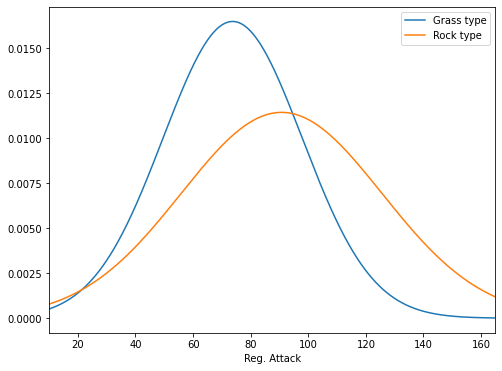

In [25]:
# As instructed I'll assume the attack stat variables to be Gaussian distributed
# so that I'll just model their distribution with their mean/std-dev values

mu_G    = grass_types.describe()['Attack'][1]
sigma_G = grass_types.describe()['Attack'][2]

mu_R    = rock_types.describe()['Attack'][1]
sigma_R = rock_types.describe()['Attack'][2]


plt.figure(figsize=(8,6))

# as plot range we pick the smallest and largest Reg. Attack stat 
min = np.min((grass_types.describe()['Attack'][3], rock_types.describe()['Attack'][3]))
max = np.max((grass_types.describe()['Attack'][7], rock_types.describe()['Attack'][7]))

x = np.linspace(min, max, 1000)

from scipy.stats import norm
plt.plot(x, norm.pdf(x, mu_G, sigma_G), label='grass')
plt.plot(x, norm.pdf(x, mu_R, sigma_R), label='rock')

plt.xlim(min, max)

plt.xlabel('Reg. Attack')

plt.legend(('Grass type','Rock type'))

print('The two variables are distributed as follows:')

from here we can calculate the probability that a Rock-type Pokemon has a 
higher Attack stat than a Grass-type Pokemon

We will assume that the attack stats of Grass-type and Rock-type are statistically independent variables,
i.e. the attack stat of a Grass-type Pokemon does not influence the attack stat of a Rock-type Pokemon
and vice versa

Like this we can define a third random variable, that will facilitate our anaylsis: The difference of the two attack stats:

Ff $a_R$ is the attack stat of a random Rock-type Pokemon and $a_G$ is the attack stat of a random Grass-type Pokemon we define 
\begin{align}
    a_X := a_R - a_G
\end{align}

In [26]:
# The mean of that variable is
mu_X = mu_R - mu_G
# and their variances just add up, so that we have
sigma_X = np.abs(np.sqrt(sigma_R**2 + sigma_G**2))
# with var = sigma^2

# P(X<0) = probability that the Grass-type has a higher attack stat than the Rock-type
# The cumulative distribution function (cdf) does exactly this
P = norm.cdf(0, mu_X, sigma_X)

So my statistical argument goes as follows:

In [27]:
print('The probability that a randomly chosen Grass-type has a higher attack stat')
print('than a randomly chosen Rock-type is only {:.1f} %!'.format(P*100))

The probability that a randomly chosen Grass-type has a higher attack stat
than a randomly chosen Rock-type is only 34.4 %!
